# Unsupervised learning: Clustering and Dimension reduction

In [55]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import keras
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, f1_score, silhouette_score
import os
import importlib
from scipy.stats import mode
import seaborn as sns
from sklearn.metrics import classification_report

In [65]:
from sklearn.decomposition import PCA, FastICA

In [5]:
import sklearn
importlib.reload(sklearn.cluster)

<module 'sklearn.cluster' from 'C:\\Users\\zhang\\anaconda3\\envs\\py39\\lib\\site-packages\\sklearn\\cluster\\__init__.py'>

## Data

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

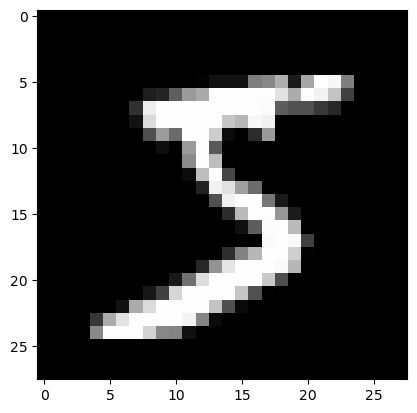

In [14]:
plt.imshow(x_train[0,:], cmap ='gray')
plt.show()

## Data split

In [17]:
random.seed(10)
selected = random.sample(range(60000), 3000)

In [19]:
x_train_sample = x_train[selected, :]

In [21]:
x_train_sample = x_train_sample.reshape(3000, 28*28)

In [23]:
y_train_sample = y_train[selected]

In [26]:
unique, counts  = np.unique(y_train_sample, return_counts = True)

In [28]:
dict(zip(unique, counts))

{0: 284,
 1: 358,
 2: 295,
 3: 312,
 4: 291,
 5: 268,
 6: 274,
 7: 309,
 8: 289,
 9: 320}

In [30]:
x_train.shape

(60000, 28, 28)

In [32]:
os.environ["OMP_NUM_THREADS"] = "12"

In [34]:
scores = []
for i in range(2, 20, 2):
    model = KMeans(i)
    pred = model.fit_predict(x_train_sample)
    score = silhouette_score(x_train_sample, pred)
    scores.append(score)

C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMea

In [36]:
scores

[0.08708753459268016,
 0.06152570553456581,
 0.06659732761604736,
 0.0522343772324723,
 0.05776780143003644,
 0.05783329045325515,
 0.062363038165730564,
 0.06269471495930294,
 0.06353049186330328]

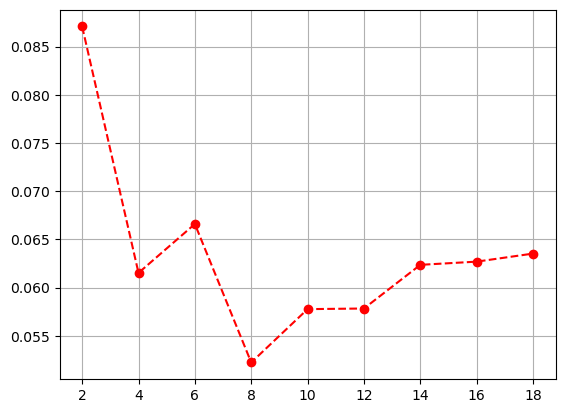

In [38]:
plt.plot(range(2, 20, 2), scores,'ro--')
plt.grid()
plt.show()

In [40]:
pred

array([ 5,  8, 16, ...,  1,  2, 13])

In [42]:
model = KMeans(10)
clusters =  model.fit_predict(x_train_sample)

C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


In [44]:
labels = np.zeros_like(clusters)
for i in range(8):
    mask = np.where(clusters == i)[0]
    labels[mask] = mode(y_train_sample[mask], keepdims = False)[0]

Text(0.5, 1.0, 'Confusion matrix')

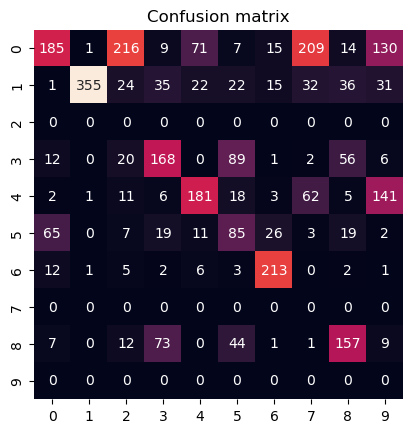

In [52]:
 mat = sklearn.metrics.confusion_matrix(y_train_sample, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.arange(10),
            yticklabels=np.arange(10)).set_title('Confusion matrix')

In [59]:
print(classification_report(y_train_sample, labels))


              precision    recall  f1-score   support

           0       0.22      0.65      0.32       284
           1       0.62      0.99      0.76       358
           2       0.00      0.00      0.00       295
           3       0.47      0.54      0.50       312
           4       0.42      0.62      0.50       291
           5       0.36      0.32      0.34       268
           6       0.87      0.78      0.82       274
           7       0.00      0.00      0.00       309
           8       0.52      0.54      0.53       289
           9       0.00      0.00      0.00       320

    accuracy                           0.45      3000
   macro avg       0.35      0.44      0.38      3000
weighted avg       0.35      0.45      0.38      3000



C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhang\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Dimension reduction

### pca

In [71]:
pca = PCA(0.9, whiten = False)
pca_reduced = pca.fit_transform(x_train_sample)

In [75]:
pca_reduced.shape

(3000, 85)

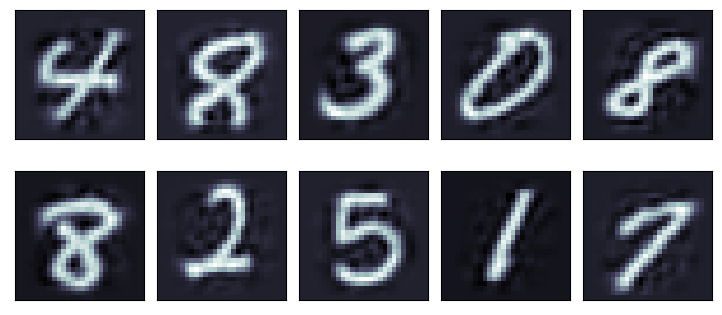

In [77]:
# Reconstruction
# Let's see if we can reconstruct the images
reconstructed = pca.inverse_transform(pca_reduced)
fig, axes = plt.subplots(2, 5, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed[i].reshape(28, 28), cmap='bone')

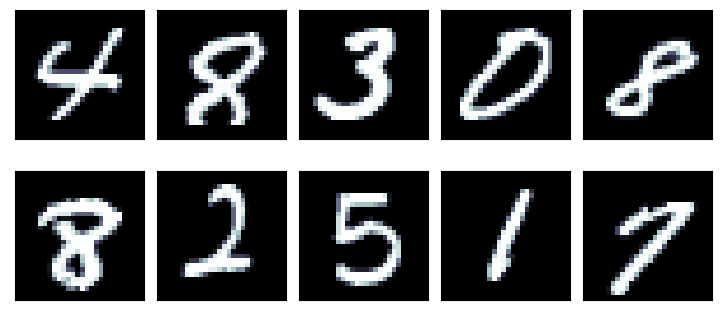

In [79]:
fig, axes = plt.subplots(2, 5, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_sample[i].reshape(28, 28), cmap='bone')